**Run the following two cells before you begin.**

In [1]:
%autosave 10

In [2]:
import pandas as pd
import numpy as np

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [3]:
# Import the data set
df = pd.read_csv(r"E:\Python\Technocolab\Project-2 Task-1\cleaned_data.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [5]:
features_response = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month']
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
LIMIT_BAL,1.000000,0.027046,-0.232688,-0.111873,0.149157
SEX,0.027046,1.000000,0.014336,-0.031307,-0.088421
EDUCATION,-0.232688,0.014336,1.000000,-0.137097,0.179035
MARRIAGE,-0.111873,-0.031307,-0.137097,1.000000,-0.412828
AGE,0.149157,-0.088421,0.179035,-0.412828,1.000000


<AxesSubplot:>

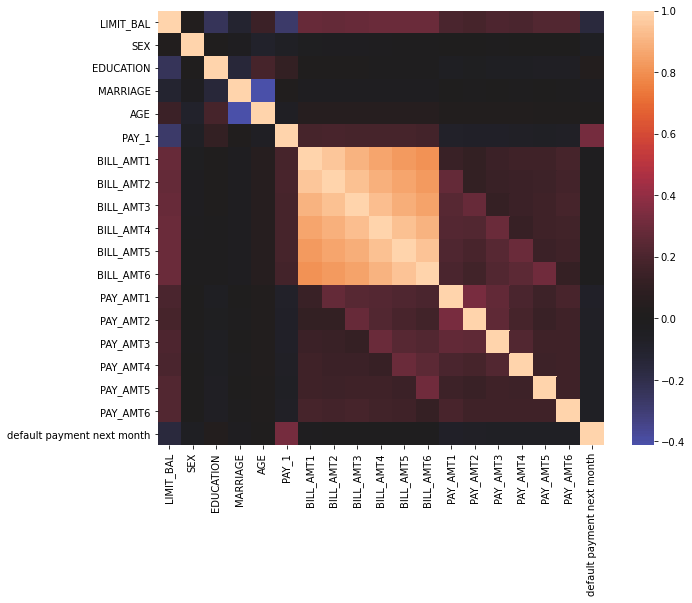

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

## Feature Selection
#### F-Test
ANOVA F-test is to separate out the features and response

In [7]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 18) (26664,)


In [8]:
#Import the f_classif function and feed in the features and response:
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X, y)

In [9]:
#create a DataFrame of feature names, F-statistics, and p-values, and show it sorted on p-value:
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                          'F statistic':f_stat,
                          'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
5,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
12,PAY_AMT1,140.612679,2.358354e-32
13,PAY_AMT2,101.408321,8.256124e-24
14,PAY_AMT3,90.023873,2.542641e-21
16,PAY_AMT5,85.843295,2.090120e-20
17,PAY_AMT6,80.420784,3.219565e-19
15,PAY_AMT4,79.640021,4.774112e-19
1,SEX,42.610039,6.801534e-11
2,EDUCATION,32.637768,1.122175e-08


The conclusions we can draw from the DataFrame of F-statistics and p-values are similar to what we observed in the correlation plot: PAY_1 and LIMIT_BAL appear to be the most useful features.

In [10]:
# Import the SelectPercentile class:
#To select the top 20% of features according to the F-test
from sklearn.feature_selection import SelectPercentile
#Use the .fit method to fit the object on our features and response data, similar to how a model would be fit:
selector = SelectPercentile(f_classif, percentile=20)
selector.fit(X, y)

SelectPercentile(percentile=20)

In [11]:
#Capture the indices of the selected features in an array named best_feature_ix:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False, False, False, False])

In [12]:
#The feature names can be obtained using all but the last element (the response variable name) of our features_response list by indexing with :-1:
features = features_response[:-1]

In [13]:
# Find the selected feature names
best_features = [features[counter] for counter in range(len(features))
                 if best_feature_ix[counter]]
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

#### Visualize default rates for different values of the PAY_1 feature

In [14]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [15]:
# Create a groupby / mean aggregation:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


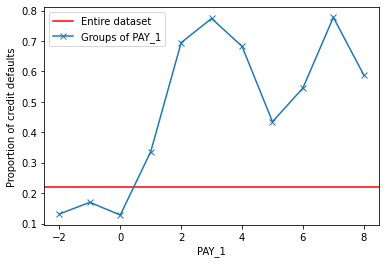

In [16]:
#Create an axes object in a variable
axes = plt.axes()
axes.axhline(overall_default_rate, color='red') # overall_default_rate is the mean of default payment next month
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset', 'Groups of PAY_1'])

# Sigmoid Function 

In [17]:
# Define the sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

X=np.linspace(-10,10,100)
Z= sigmoid(X)
print(X,Z)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

Text(0.5, 1.0, 'Sigmoid Function')

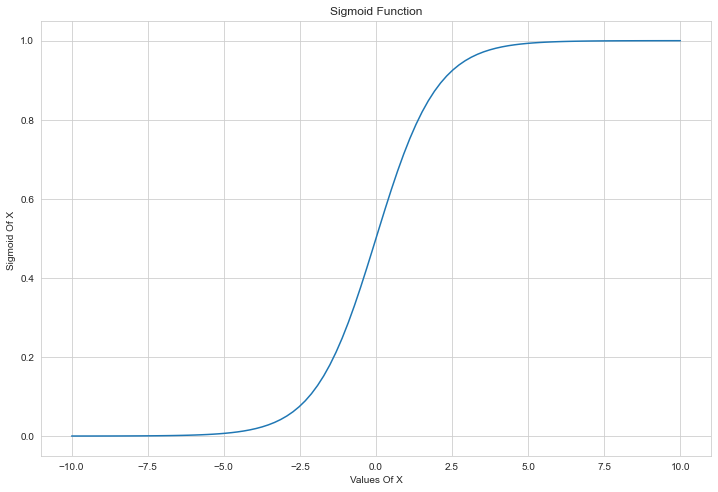

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.plot(X,sigmoid(X))
plt.xlabel('Values Of X')
plt.ylabel('Sigmoid Of X ')
plt.title('Sigmoid Function')

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [20]:
features = ["PAY_1","LIMIT_BAL"]
X = df[features].values
y = df["default payment next month"].values

In [21]:
X.shape

(26664, 2)

In [22]:
y.shape

(26664,)

In [23]:
# Create a train/test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 ,random_state = 2)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 2)
(5333, 2)
(21331,)
(5333,)


______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [25]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(solver="liblinear")

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [26]:
# Fit the logistic regression model on training data
Lr.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [27]:
# Make predictions using `.predict()`
y_pred = Lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
# Find class probabilities using `.predict_proba()`
pred_proba = Lr.predict_proba(X_test)
pred_proba

array([[0.69695023, 0.30304977],
       [0.94136816, 0.05863184],
       [0.80027728, 0.19972272],
       ...,
       [0.58589161, 0.41410839],
       [0.89580361, 0.10419639],
       [0.61911885, 0.38088115]])

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [29]:
# Add column of 1s to features  -> Using Numpy Ones Array to automatocally get a array of Ones with given input shape :
np.ones((X_test.shape[0],1))

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [30]:
np.ones((X_test.shape[0],1)).shape

(5333, 1)

In [31]:
ones_feats = np.hstack([np.ones((X_test.shape[0],1)),X_test])
ones_feats

array([[ 1.0e+00,  2.0e+00,  1.2e+05],
       [ 1.0e+00, -1.0e+00,  4.0e+05],
       [ 1.0e+00, -1.0e+00,  2.0e+05],
       ...,
       [ 1.0e+00,  0.0e+00,  5.0e+04],
       [ 1.0e+00, -2.0e+00,  3.1e+05],
       [ 1.0e+00,  0.0e+00,  7.0e+04]])

In [32]:
# Get coefficients and intercepts from trained model
print('Coefficients Of Our Logistic Model',Lr.coef_)
print('Intercept of Our Logistic Model',Lr.intercept_)
log_model_coeff=Lr.coef_
log_model_intercept=Lr.intercept_

Coefficients Of Our Logistic Model [[ 8.11160706e-11 -6.94014120e-06]]
Intercept of Our Logistic Model [-6.74386096e-11]


In [33]:
# Comcatenate the intercept and coefficients value 
coeff_interc_feats=np.concatenate([log_model_intercept.reshape(1,1),log_model_coeff],axis=1)
coeff_interc_feats

array([[-6.74386096e-11,  8.11160706e-11, -6.94014120e-06]])

In [34]:
# Manually calculate predicted probabilities
# np.dot --> dot product of arrays
# np.transpose --> returns the transpose of an array
# X = intercept_ + coef_1 * X_1 + coef_2 * X_2
man_pred_proba=np.dot(coeff_interc_feats,np.transpose(ones_feats))
man_pred_proba

array([[-0.83281694, -2.77605648, -1.38802824, ..., -0.34700706,
        -2.15144377, -0.48580988]])

In [35]:
#Applying Sigmoid function :
# prediction = sigmoid(X)
sig_man_predproba = sigmoid(man_pred_proba)
sig_man_predproba

array([[0.30304977, 0.05863184, 0.19972272, ..., 0.41410839, 0.10419639,
        0.38088115]])

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [36]:
# Manually calculate predicted classes
pred_manual= sig_man_predproba >= 0.5
pred_manual.shape

(1, 5333)

In [37]:
# Compare to scikit-learn's predicted classes
# reshape the y_pred as row wise
np.array_equal(pred_manual,y_pred.reshape(1,-1))

True

______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

In [38]:
from sklearn.metrics import roc_auc_score

In [39]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
roc_auc_score(y_test,pred_proba[:,1])

0.6301663819054594

In [40]:
# Use manually calculated predicted probabilities to calculate ROC AUC
roc_auc_score(y_test,man_pred_proba.reshape(man_pred_proba.shape[1],))

0.6301663819054594